<h1> <b> Defining the problem statement </b> </h1>

<b> Complete the analysis of what sorts of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.</b>


In [6]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

<h3>Import Libraries</h3>

Let's import some libraries to get started!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, model_selection


<h3> The Data </h3>

Let's start by reading in the train.csv and test.csv files into a pandas dataframe.<br>
<b>train.csv file</b> : is the file on which we will find our final result<br>
<b> test.csv file </b> : is the file through which we will test our final result


In [8]:
filepath1 =r'C:\Users\skjai\OneDrive\Desktop\train.csv'
filepath2=r'C:\Users\skjai\OneDrive\Desktop\test.csv'
df1= pd.read_csv(filepath1)
df2=pd.read_csv(filepath2)
df1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h4> Copying the data of both csv files into new dataframes so that changes done in the files cannot be done in the orginal files </h4>

In [9]:
train = df1.copy()
test = df2.copy()

<h1> Exploratory Data Analysis </h1>

<b>Reading the dataframes</b>

In [26]:
train.head(10) #reading first ten rows of dataframe using head() function

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



<h3>Data Dictionary</h3>

Survived: 0 = No, 1 = Yes <br>
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd<br>
sibsp: # of siblings / spouses aboard the Titanic<br>
parch: # of parents / children aboard the Titanic<br>
ticket: Ticket number<br>
cabin: Cabin number<br>
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton<br>



In [27]:
train.tail(10) #reading last ten rows of dataframe using tail() function

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [12]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [13]:
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
train.shape  #checking the no of rows and columns in the dataset using shape

(891, 12)

We can see that there are 891 rows and 12 columns in our training dataset.

In [15]:
test.shape

(418, 11)

We can see that there are 418 rows and 11 columns in our test dataset.

In [30]:
train.ndim #checking dimensions of the dataset

2

In [17]:
test.ndim

2

In [31]:
train.describe().T #describing the dataset using describe()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [32]:
train.columns  #finding the names of columns of the dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
train.dtypes  #finding the datatype of the columns using dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
train.info()    #checking the no of non-null and null values of each columns using info() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



We observed that there are null values in Age, Embarked and Cabin Columns.


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We observed that there are null values in Age, Fare and Cabin columns

In [35]:
train.isnull().sum() # summing up total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We observed that 177 tuples in Age column, 687 tuples in Cabin column and 2 tuples in Embarked column are null entries.

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We observed that 86 tuples in Age column, 327 tuples in Cabin column and 1 tuple in Fare column are null entries.

<h3>Visualizing the null values using heatmap</h3>

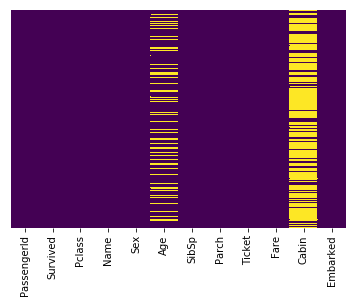

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

About 19.8% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 



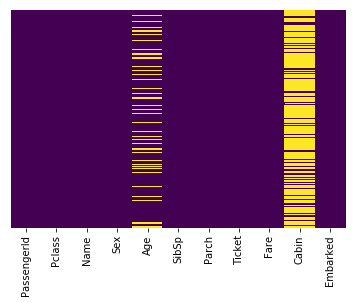

In [44]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

About 21% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 

Let's continue on by visualizing some more of the data!

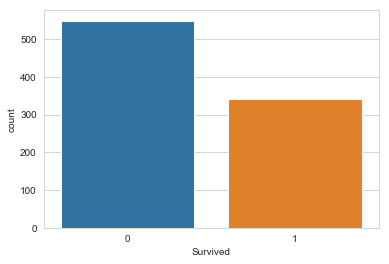

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

The frequency of survived people is less than that of unsurvived people

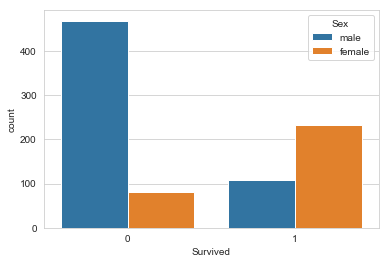

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex',data=train)

The Chart confirms Women more likely survivied than Men

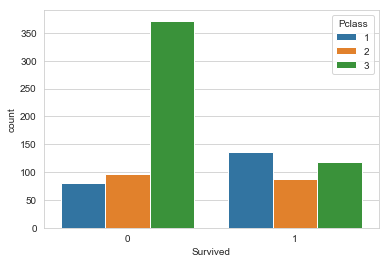

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Pclass',data=train)

The Chart confirms 1st class more likely survivied than other classes.<br>
The Chart confirms 3rd class more likely dead than other classes

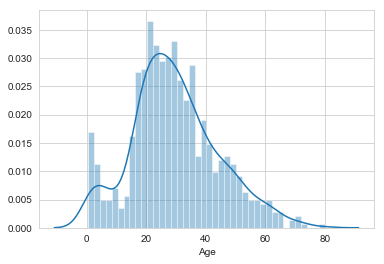

In [49]:
sns.distplot(train['Age'].dropna(),kde=True,bins=40)

This plot shows that there is the large number of adult passesngers on the ship between 25 to 40 years of age. There are low no of young and old passengers.

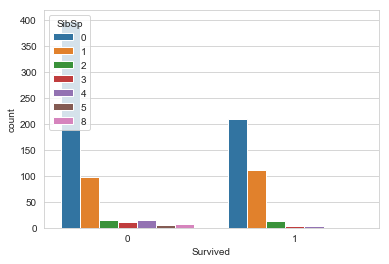

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'SibSp',data=train)

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
The Chart confirms a person aboarded without siblings or spouse more likely dead

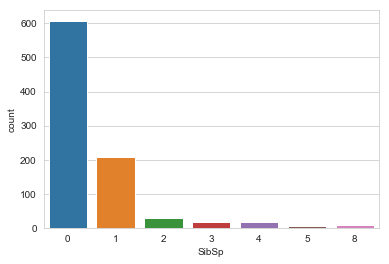

In [57]:
sns.countplot(x='SibSp',data=train)

This chart shows that a large no of passengers did not carry their siblings or their wives.

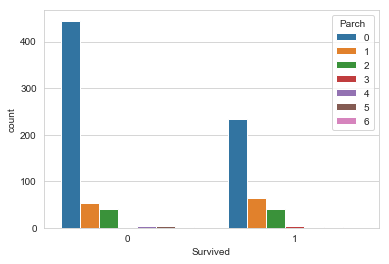

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Parch',data=train)

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.It confirms a person aboarded alone more likely dead

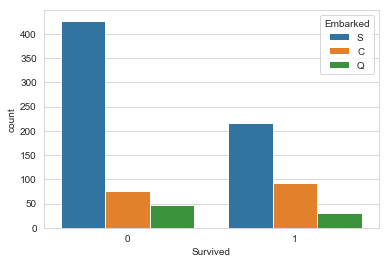

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Embarked',data=train)



The Chart confirms a person aboarded from Q are slightly more likely survived and a person aboarded from S are more likely dead



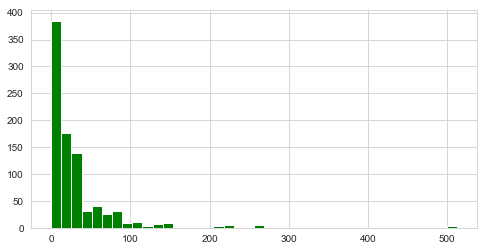

In [51]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

This chart shows that there are many passengers who paid a large fare on the ship. (may be VIPs)


<h2>Data Cleaning</h2>

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean or median age of all the passengers (imputation). However we will check the average age by passenger class.<br>
Let plot a boxplot to find the average age of passengers by their class (Pclass).

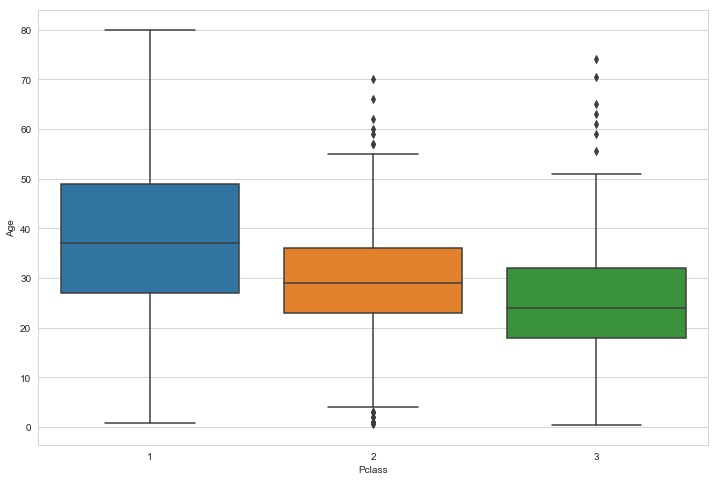

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

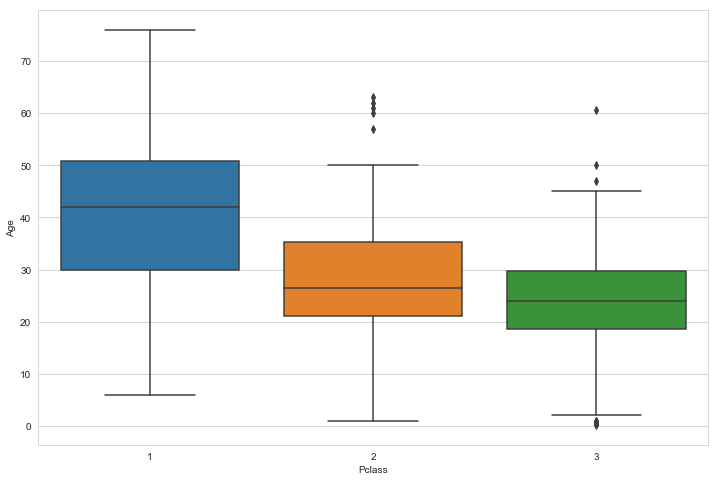

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=test)

In [63]:
# function for computing the null values in age column via Pclass of train dataset

def train_compute_null_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [64]:
# function for computing the null values in age column via Pclass of test dataset

def test_compute_null_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        if Pclass==2:
            return 27
        else:
            return 25
    else:
        return Age

Let's apply the functions !

In [65]:
train['Age']=train[['Age','Pclass']].apply(train_compute_null_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(test_compute_null_age,axis=1)

Checking the heatmap again

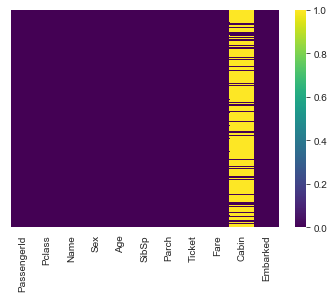

In [66]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

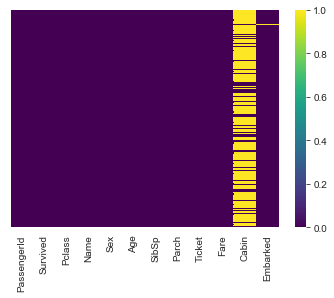

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

We observed that the Age column does not contain any null values in both train and test datasets.<br>
Now we will drop the Cabin Column in both train and test dataset as it contains a lot of null values which can affect our model in the further analysis.

In [68]:
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

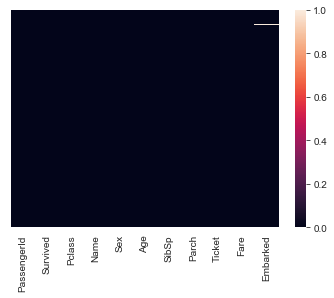

In [69]:
sns.heatmap(train.isnull(),yticklabels=False)

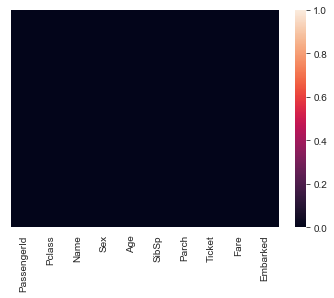

In [70]:
sns.heatmap(test.isnull(),yticklabels=False)

In [71]:
# if any other NAN values will be still exist, then dropping them all now
train.dropna(inplace=True)
test.dropna(inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We have done with Data Cleaning now. There are no null values in our dataset now. We will move to Feature Engineering.


<h1>Feature engineering</h1>

Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.
Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.


<b>The Titanic sank from the bow of the ship where third class rooms located. It conclused that Pclass is key feature for classifier.</b>

In [75]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [74]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

<h2> Name </h2>

In [78]:
train_test_data = [train,test] #combining train and test data
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [79]:
train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Ms            1
Jonkheer      1
Lady          1
Capt          1
Mme           1
Countess      1
Sir           1
Name: Title, dtype: int64

In [80]:
test['Title'].value_counts()

Mr        239
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


Title map

Mr : 0

Miss : 1

Mrs: 2

Others: 3


In [81]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Mme":3,"Countess":3,"Lady":3,"Don":3,"Sir":3,"Capt":3,"Ms":3,"Jonkheer":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2.0


In [85]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [86]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,S,2.0


In [88]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0


In [87]:
sex_map = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_map)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Title          889 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0


## Binning
Binning/Converting Numerical Age to Categorical Variable

feature vector map: child: 0 young: 1 adult: 2 mid-age: 3 senior: 4

In [96]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [97]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,1,0.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,1,0.0,1,0,113803,53.1000,S,2
4,5,0,3,0,0.0,0,0,373450,8.0500,S,0


In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,0,0.0,0,0,330911,7.8292,Q,0.0
1,893,3,1,0.0,1,0,363272,7.0000,S,2.0
2,894,2,0,0.0,0,0,240276,9.6875,Q,0.0
3,895,3,0,0.0,0,0,315154,8.6625,S,0.0
4,896,3,1,0.0,1,1,3101298,12.2875,S,2.0


In [99]:
train['Embarked'].isnull().sum()

0

### Embarked

In [100]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,0.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,0.0,1,0,113803,53.1000,0,2
4,5,0,3,0,0.0,0,0,373450,8.0500,0,0


### Fare

In [102]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [103]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,0.0,1,0,A/5 21171,0.0,0,0
1,2,1,1,1,0.0,1,0,PC 17599,2.0,1,2
2,3,1,3,1,0.0,0,0,STON/O2. 3101282,0.0,0,1
3,4,1,1,1,0.0,1,0,113803,2.0,0,2
4,5,0,3,0,0.0,0,0,373450,0.0,0,0


In [104]:
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [105]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,0.0,0.0,0,0
1,1,1,1,0.0,2.0,1,2
2,1,3,1,0.0,0.0,0,1
3,1,1,1,0.0,2.0,0,2
4,0,3,0,0.0,0.0,0,0


#  Building Machine Learning Models

## Modelling

In [134]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
Fare        889 non-null float64
Embarked    889 non-null int64
Title       889 non-null int64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


## Cross Validation (K-fold)

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

<b>KNN</b>

In [137]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)



[0.97752809 0.91011236 0.98876404 0.96629213 0.98876404 0.97752809
 0.97752809 0.93258427 0.92134831 0.98863636]


In [138]:
# kNN Score
round(np.mean(score)*100, 2)

96.29

<b>Decision tree</b>

In [139]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [140]:
# decision tree Score
round(np.mean(score)*100, 2)


100.0